In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
import geopandas as gpd

## Data Import

In [31]:
car_df = pd.read_csv('car-assignments.csv')
gps_df = pd.read_csv('gps.csv')
loyalty_df = pd.read_csv('loyalty_data.csv', encoding='cp1252')
cc_df = pd.read_csv('cc_data.csv', encoding='cp1252')

In [17]:
car_df.head()

,LastName,FirstName,CarID,CurrentEmploymentType,CurrentEmploymentTitle
0,Alcazar,Lucas,1.0,Information Technology,IT Helpdesk
1,Azada,Lars,2.0,Engineering,Engineer
2,Balas,Felix,3.0,Engineering,Engineer
3,Barranco,Ingrid,4.0,Executive,SVP/CFO
4,Baza,Isak,5.0,Information Technology,IT Technician


In [18]:
gps_df.head()

,Timestamp,id,lat,long
0,01/06/2014 06:28:01,35,36.076225,24.874689
1,01/06/2014 06:28:01,35,36.076220,24.874596
2,01/06/2014 06:28:03,35,36.076211,24.874443
3,01/06/2014 06:28:05,35,36.076217,24.874253
4,01/06/2014 06:28:06,35,36.076214,24.874167


In [20]:
loyalty_df.head()

,timestamp,location,price,FirstName,LastName
0,1/6/2014,Brew've Been Served,4.17,Cornelia,Lais
1,1/6/2014,Brew've Been Served,9.60,Mat,Bramar
2,1/6/2014,Hallowed Grounds,16.53,Emile,Arpa
3,1/6/2014,Coffee Shack,11.51,Varro,Awelon
4,1/6/2014,Hallowed Grounds,12.93,Rachel,Pantanal


In [19]:
cc_df.head()

,timestamp,location,price,FirstName,LastName
0,1/6/2014 7:28,Brew've Been Served,11.34,Edvard,Vann
1,1/6/2014 7:34,Hallowed Grounds,52.22,Hideki,Cocinaro
2,1/6/2014 7:35,Brew've Been Served,8.33,Stenig,Fusil
3,1/6/2014 7:36,Hallowed Grounds,16.72,Birgitta,Frente
4,1/6/2014 7:37,Brew've Been Served,4.24,Sven,Flecha


## Shapefile Experiments

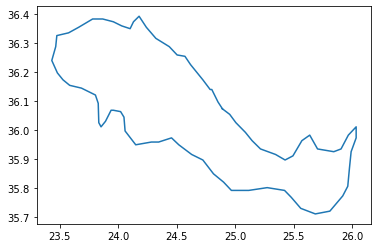

In [2]:
sf = shp.Reader("Geospatial/Kronos_Island.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

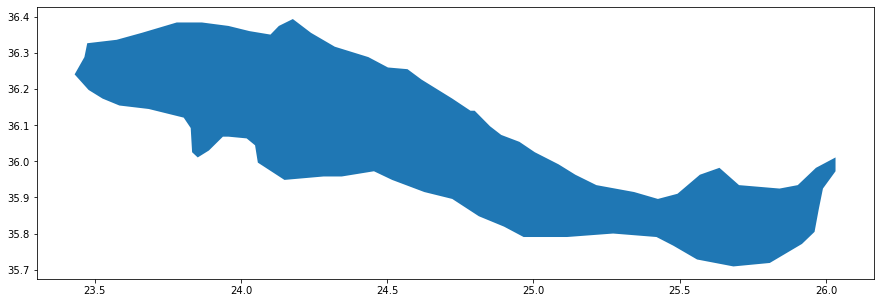

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
file_path = 'Geospatial/Kronos_Island.shp'
map_df = gpd.read_file(file_path)
map_df.plot(ax=ax)
plt.show()

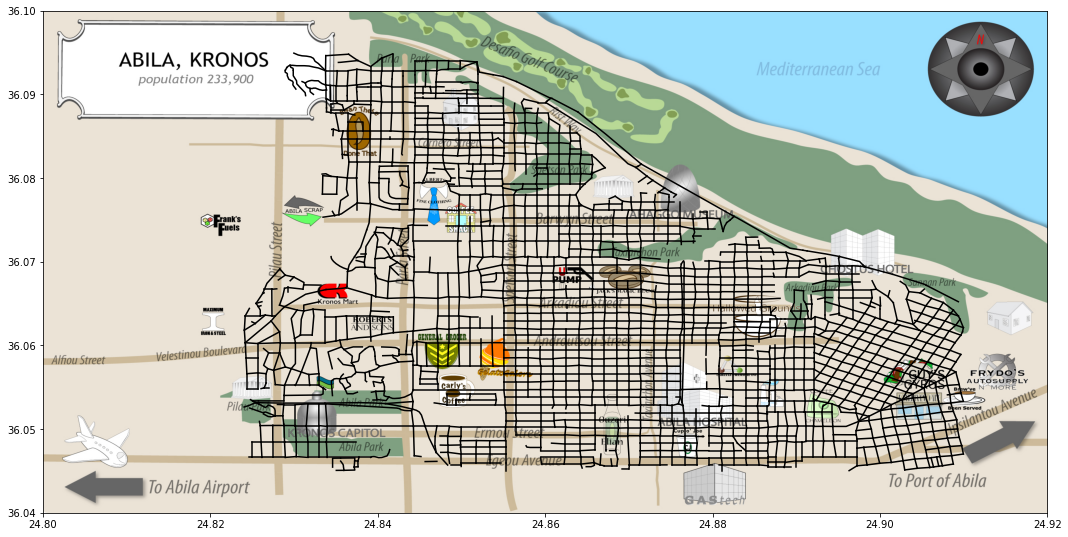

In [25]:
sf = shp.Reader("Geospatial/Abila.shp")

img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(18,18))
ax.imshow(img, extent=[24.80, 24.92, 36.04, 36.1])
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax = plt.plot(x,y, color ='k')
plt.show()

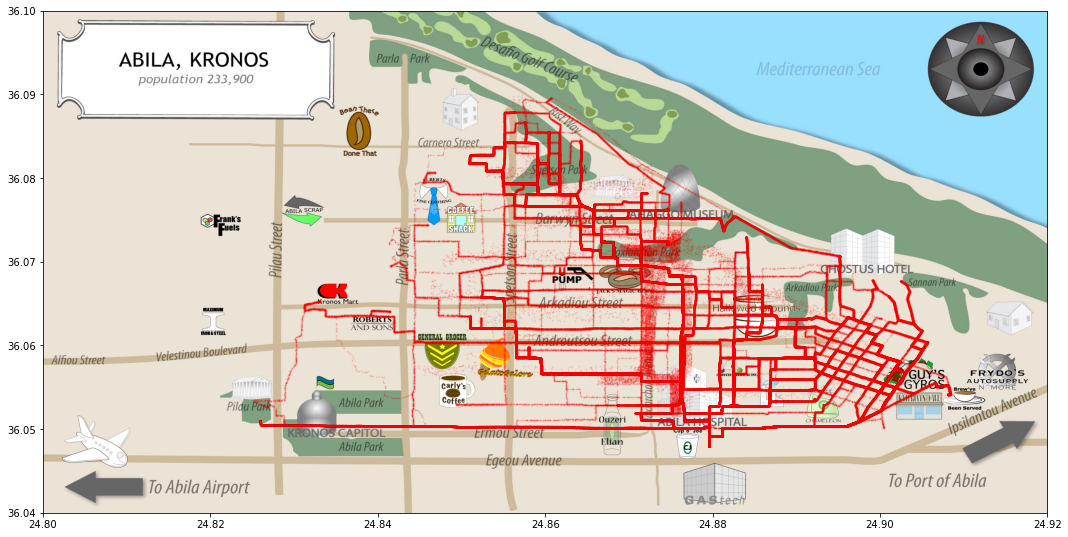

In [35]:
long_border = (36.04,36.1)
lat_border = (24.8,24.92)

img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(18,18))
ax.imshow(img, extent=[24.80, 24.92, 36.04, 36.1])

ax = plt.scatter(gps_df['long'].values, gps_df['lat'].values, color='red', s=0.5, label='train', alpha=0.1)
plt.ylim(long_border)
plt.xlim(lat_border)
plt.show()

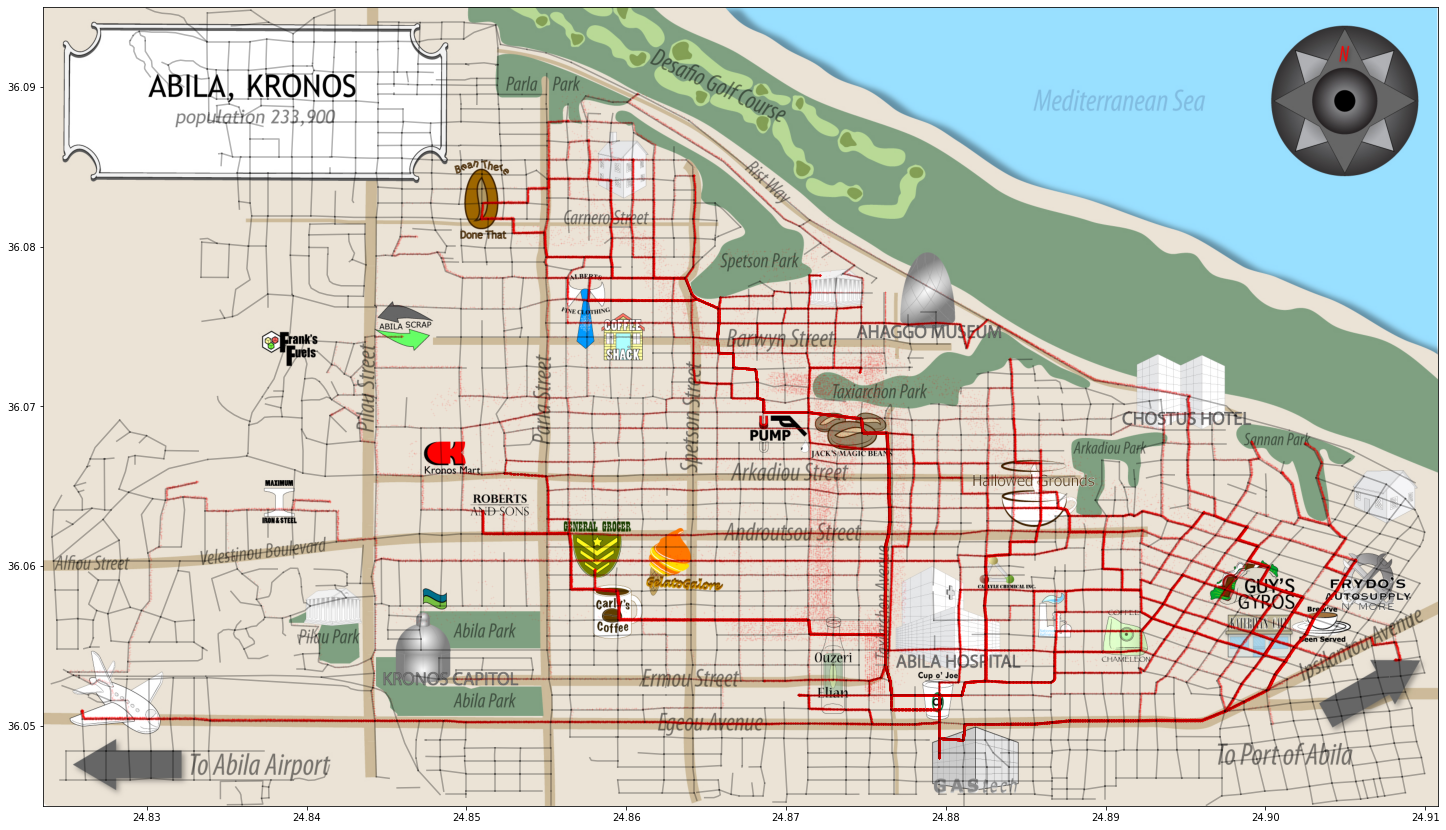

In [74]:
sf = shp.Reader("Geospatial/Abila.shp")

img = plt.imread("map-tourist.jpg")
fig, ax = plt.subplots(figsize=(25,20))
ax.imshow(img, extent=[24.8235, 24.9108, 36.045, 36.095])
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax = plt.plot(x,y, color ='k', alpha=0.3)

ax = plt.scatter(gps_df['long'].values, gps_df['lat'].values, color='red', s=0.5, label='train', alpha=0.05)

plt.show()

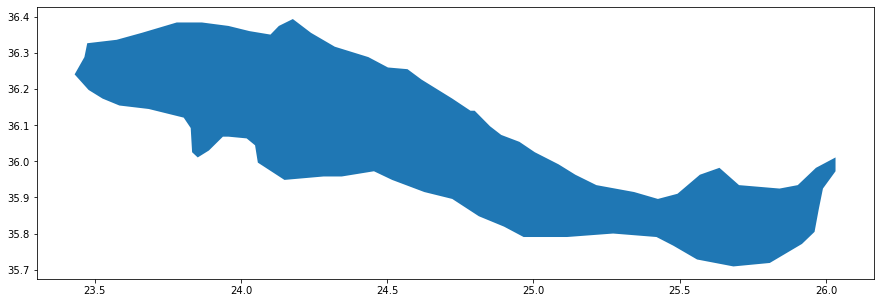